In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [2]:
df=pd.read_csv('cpp_cleaned_data')

In [3]:
x=df.drop(['price'],axis=1)
y=df['price']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [5]:
rfr=RandomForestRegressor(n_estimators=600)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [6]:
print(f"Score of train data: {rfr.score(x_train,y_train)}")
print(f"Score of test data: {rfr.score(x_test,y_test)}")

Score of train data: 0.9886208780311255
Score of test data: 0.9175790175329829


In [7]:
rfr.predict([x_test.iloc[1,:]])

array([19640.54000167])

In [8]:
y_test.iloc[1]

17710.0

In [9]:
#check the accuracy of model
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,y_pred)
r2_sc=r2_score(y_test,y_pred)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr2_score: {r2_sc}")

mse: 3915327.496867802
rmse: 1978.7186502552104
mae: 1280.5582268099108
r2_score: 0.9175790175329829


In [10]:
r2_score(y_test,y_pred)

0.9175790175329829

In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

cv=KFold(n_splits=10,shuffle=True,random_state=12)
rfr=RandomForestRegressor()

In [12]:
clf=RandomizedSearchCV(rfr,parm_grid,scoring='accuracy',cv=cv,n_jobs=-1,)

In [13]:
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

/home/vaishu/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [14]:
clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [15]:
clf.predict([x_test.iloc[1,:]])

array([19376.25916667])

In [16]:
y_test.iloc[1]

17710.0

/home/vaishu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

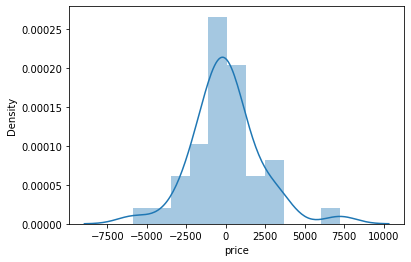

In [18]:
import seaborn as sns
sns.distplot(y_test-pred)

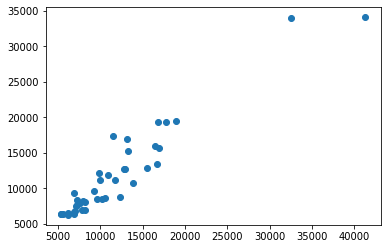

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)

In [ ]:
#check the accuracy of model
mse=mean_squared_error(y_test,pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,pred)
r2_sc=r2_score(y_test,pred)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr2_score: {r2_sc}")